# Exploratory Data Analysis of the Flu Shot Data:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns

## Load the Data

In [6]:
y_train = pd.read_csv('../Data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Labels.csv')
X_test = pd.read_csv('../Data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Test_Features.csv')
X_train = pd.read_csv('../Data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Features.csv')
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (26707, 36)
Shape of X_test: (26708, 36)
Shape of y_train: (26707, 3)


In [21]:
X_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [26]:
types = pd.DataFrame(X_train.dtypes)
types

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


Data is a mix of 64 bit integers, 64 floating point nums, and objects, may need to 1 hot encode object predictors.

In [31]:
numeric_preds = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_preds = X_train.select_dtypes(include=['object']).columns
print("Numeric predictors: " , numeric_preds)
print("Categorical predictors: " , cat_preds)

Numeric predictors:  Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')
Categorical predictors:  Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')


## Handle Empty (NaN) values


In [16]:
X_train_nas = pd.DataFrame(X_train.isna().sum())
X_train_nas

,0
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


Clearly there are far too many NA values to possibly remove all of them, as we would remove a significant amount of predictive power. However, we should consider feature selection methods for extracting the most amount of valuable information from our data while omitting useless information.

### Feature Selection (Filter & Wrapper based methods)

1) Filter Based

Here we will investigate the correlation between predictors to investigate potential redundant predictors

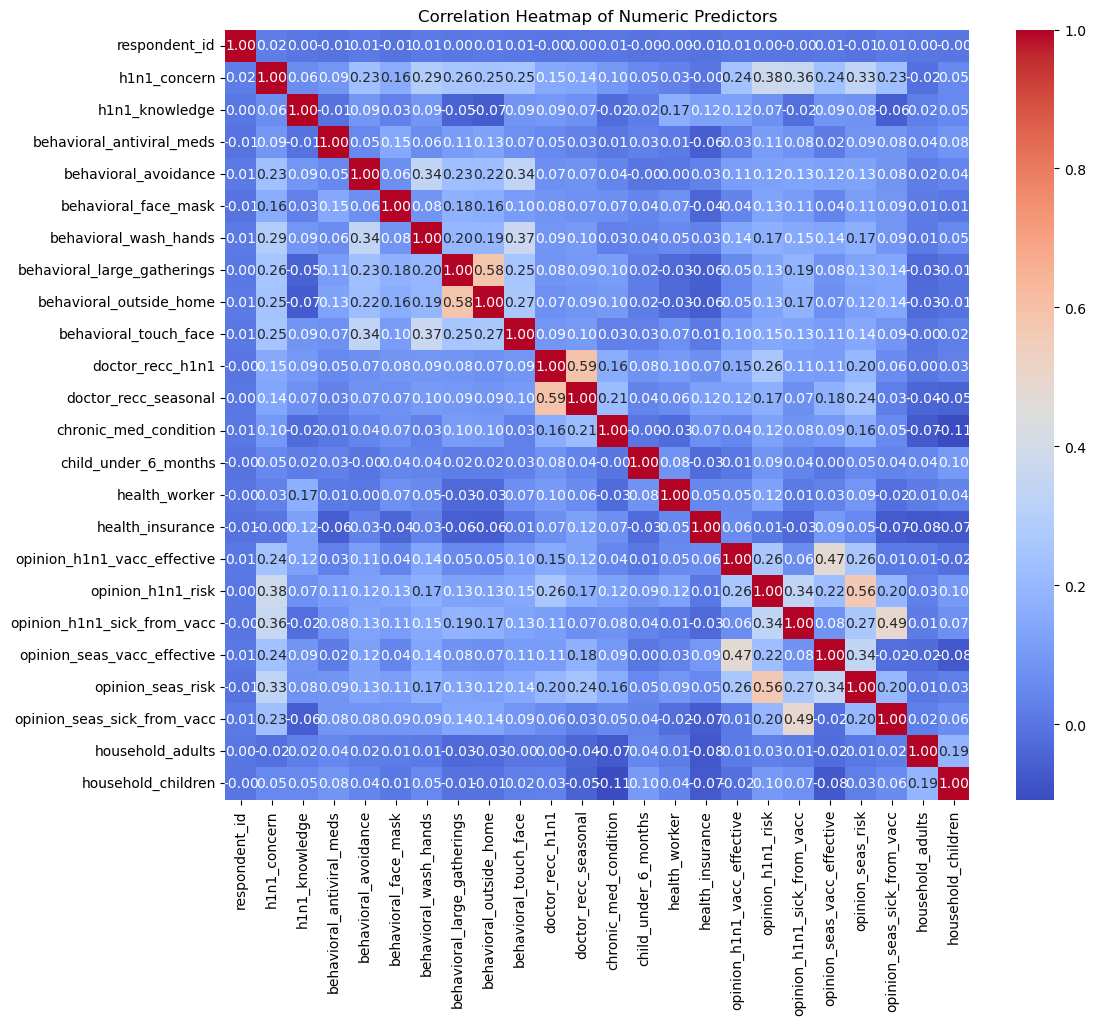

In [32]:
#Plot a heatmap of the corrrelations between predictors
plt.figure(figsize=(12, 10))
sns.heatmap(X_train[numeric_preds].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Predictors')
plt.show()

From this we can conclude the following pairs of predictors are largely correlated:
1) behavioural_outside_home, behavioral_large_gatherings
2) doctor_recc_seas, doctor_recc_h1n1
3) opinion_seas_vacc_effective, opinion_h1n1_vacc_effective
4) opinion_seas_risk, opinion_h1n1_risk
5) opinion_seas_sick_from_vacc, opinion_h1n1_sick_from_vacc

### Dimensionality Reduction (PCA, LDA)

## Analysing the distributions of the predictors

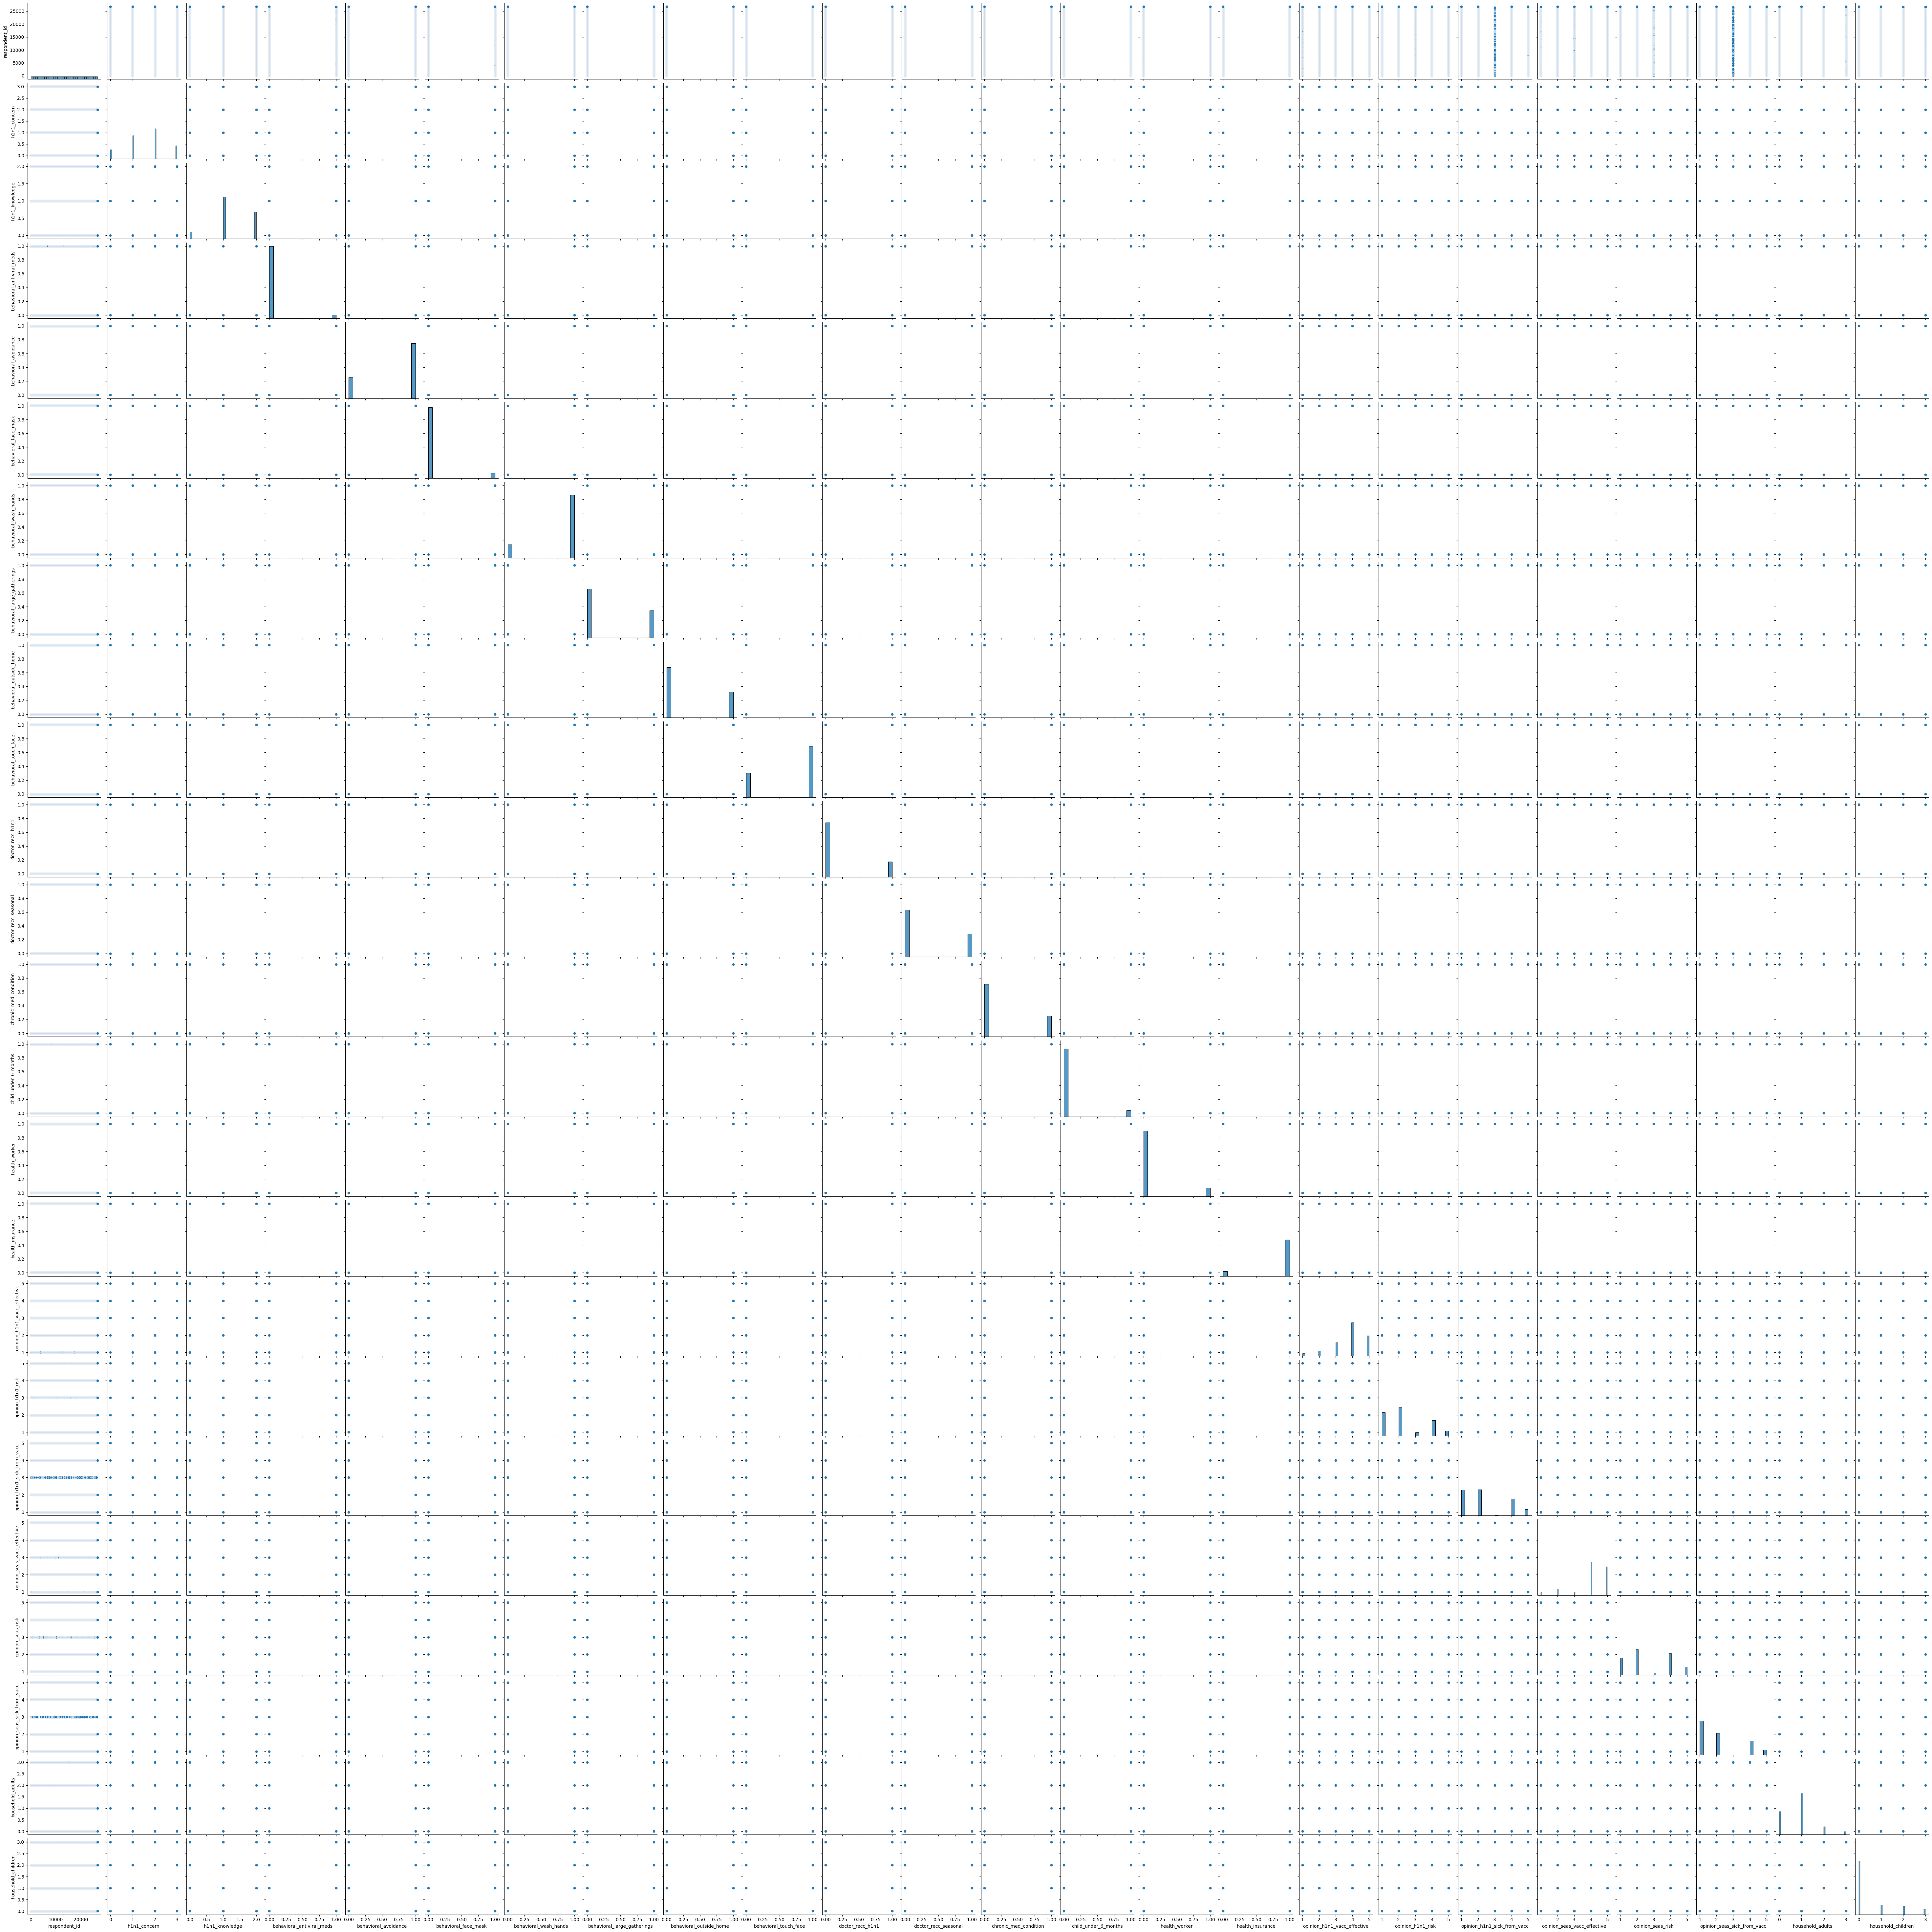

In [18]:
sns.pairplot(X_train)